In [50]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_dir = '../kaggle_data/'

In [3]:
kaggle_train = data_dir+'train.csv'

In [6]:
df = pd.read_csv(kaggle_train)
#df_train,df_cv = train_test_split(pd.read_csv(kaggle_train))

In [14]:
#df_train.sortlevel()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
81850,163402,0,1.483164e+00,4.510776,C,4.456953,8.459987,2.501337,2.362372,0.175105,8.908045,1.838074,15.677554,6.507374,2.786730,11.636386,2.147436,3.021583,2.586409,1.453813,0.200727,17.595857,6.444313,QHL,-7.638731e-07,B,0.063312,1.528595,3.639766,7.998716,6.948157,C,A,1.242650,1.485837,6.174084,6.616783,13.741821,6.787323e-01,0,1.504149e+00,10.787932,6.028861,11.020845,2.168172,9.098294,7.615905,0.118093,F,13.868777,6.803847,2.451764,7.740114,B,15.769230,0.066608,0.721540,DS,3.890967,9.217306e+00,7.899156,1.391412,13.959451,1,0.099986,4.662889,15.888086,B,7.691075,17.063685,6.474819,8.179259,F,1,2.244034,B,D,1.539643,6.007482,14.820144,K,1.206896,8.006715,12.755400,1.651524,0.673437,2.683438,1.074292,7.654278,1.956173,0.108606,0.832307,A,0.470326,4.840354,3.526693,0.523544,5.478354,6.425340,11.826321,0.979868,10.218766,4.570031,1.761915,4.924542,2.027407,0.082272,10.094074,E,1.422740,2.368927e-07,A,3.014432,U,G,14.011299,13.525179,2.184616,4.469388e-07,7.058823,2.310623e+00,1.555664,2.427337,7.701149,2.833939,3.604210e-07,CI,1.498079,6.313468,1.256174,0,1.257918,2.158273e+00
53996,107901,1,2.851028e+00,3.463199,C,1.303852,7.432718,1.678081,1.977739,1.849809,7.038917,1.291028,13.512907,6.320514,7.156738,10.881189,3.510498,7.890626,1.015273,0.452329,0.467301,14.257544,6.011115,OPF,1.988016e+01,E,1.957544,1.271404,1.583905,4.992517,5.436645,C,A,2.671233,4.383562,7.822321,5.941782,16.233438,1.558441e+00,0,5.885315e-08,7.631142,5.154109,14.118151,1.818182,6.405311,11.282201,1.907755,C,17.365233,7.080480,1.854595,12.625805,G,14.614174,1.455283,4.160959,AS,3.647259,1.912500e+01,8.725431,0.988869,9.225718,1,2.167151,1.947530,10.735503,A,7.628424,19.343750,12.656249,13.335919,F,1,4.863450,B,D,0.588056,5.171234,10.703125,E,3.417935,9.574791,3.442688,3.518835,5.188357,5.583174,1.374143,7.232147,0.599316,2.051015,1.612411,A,0.433284,2.104518,6.873528,0.637819,3.972603,5.454546,5.186633,0.580764,0.781249,2.513527,3.599450,9.855275,5.515438,0.837784,5.134402,E,1.724133,1.506637e+00,B,4.880137,F,NaN,15.985868,7.421874,1.984253,6.612986e+00,7.012986,1.701469e+01,0.687500,4.969771,3.620982,13.786682,2.259739e+00,G,2.809006,0.593964,1.127575,0,4.432900,1.406250e+00
70662,140983,1,1.028731e+00,13.800640,C,3.423682,8.291862,1.927710,2.947174,0.042062,8.235293,1.816192,15.659229,6.999212,3.273130,13.144690,1.770153,5.882353,3.589635,0.315217,0.196149,17.665616,7.754070,XDM,1.574111e-07,E,0.134144,1.970962,3.039852,2.304896,8.507878,C,B,1.362372,1.260426,7.985440,9.304912,11.017252,3.773576e-01,0,1.455375e-01,7.901744,7.154773,13.197404,2.352942,10.419690,9.571584,0.111796,C,11.783682,8.044485,1.040275,6.634152,I,15.904139,0.047368,0.834106,DI,4.133457,3.004484e+00,12.194463,1.869014,17.223678,0,0.181545,6.299775,16.644324,A,9.138091,18.475336,8.823530,9.940439,F,1,2.070656,B,D,2.172264,7.896200,12.352941,B,1.680672,7.105890,8.791594,1.167749,1.112141,3.423423,1.084337,9.008913,1.260426,0.116519,1.065861,B,0.459848,5.319924,4.299381,0.494090,6.765524,6.918239,8.239694,1.393266,16.905830,10.062521,1.940871,6.269893,2.404313,0.023982,13.025118,B,2.365693,4.720395e+00,B,2.113068,T,NaN,15.556301,11.176470,2.396514,7.219112e+00,7.295597,4.804231e-02,1.390134,1.451613,6.554621,2.264752,2.014571e-02,Z,1.711655,2.085264,2.229235,1,0.855346,1.764707e+00
64171,128110,1,2.606817e+00,2.366567,C,2.531649,9.183545,2.572727,1.481818,10.891316,9.102403,0.568927,15.536925,6.056835,6.321546,9.885333,2.502770,5.3132

In [38]:
person_id = df['ID']
y_df = df['target']
category_features = ['v3','v22','v24','v30','v31','v47','v52','v56','v66','v71',\
                     'v74','v75','v79','v91','v107','v110','v112','v113','v125']
integer_features = ['v38','v62','v72','v129']

non_numeric = ['ID','target']+category_features+integer_features
numeric_features = []
for c in df.columns:
    if c not in non_numeric:
        numeric_features.append(c)


In [39]:
df_num = df[numeric_features]

In [40]:
for c in df_num.columns.values:
    df_num[c] = df_num[c].fillna(df_num[c].mean())

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
X = df_num.values
y = y_df.values

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(array([   318.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  85422.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

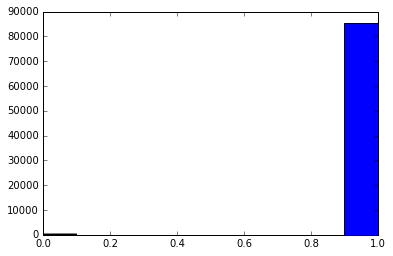

In [54]:
# Predictions on training
plt.hist(clf.predict(X))

(array([ 20366.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  65374.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

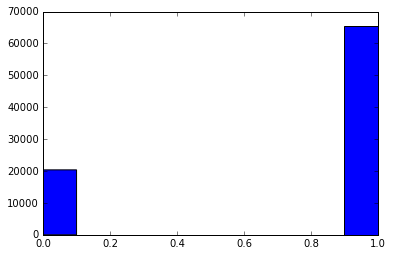

In [53]:
# Actual targets
plt.hist(y)